# **Item 1**

Para o Item 1, precisamos resolver o seguinte sistema de equações não lineares:
$$
  \begin{align}
    x_1 x_2 + x_1 &- 3 x_5 = 0, \nonumber \\
    2x_1 x_2 + x_1 + 3 R_{10} x_2^2 + x_2 x_3^2 + & R_7 x_2 x_3 + R_9 x_2 x_4 + R_8 x_2 - R x_5 = 0, \nonumber \\
    2 x_2 x_3^2 + R_7 x_2 x_3 + & 2 R_5 x_3^2 + R_6 x_3 - 8x_5 = 0, \nonumber \\
    R_9 x_2 x_4 + & 2 x_4^2 - 4 R x_5 = 0, \nonumber \\
    x_1 x_2 + x_1 + R_{10} x_2^2 + x_2 x_3^2 + R_7 x_2 x_3 & + R_9 x_2 x_4 + R_8 x_2 + R_5 x_3^2 + R_6 x_3 + x_4^2 - 1 = 0
  \end{align}
$$
onde $0.0001 \leq x_i \leq 100$, $i=1,2,...,5$, $R = 10$, $R_5 = 0.193$, $R_6 = 4.10622 \times 10^{-4}$, $R_7 = 5.45177 \times 10^{-4}$, $R_8 = 4.4975 \times 10^{-7}$, $R_9 = 3.40735 \times 10^{-5}$ e $R_{10} = 9.615 \times 10^{-7}$.

In [1]:
R, R5, R6, R7, R8, R9, R10 = [10.0, 0.193, 4.10622e-4, 5.45177e-4, 4.4975e-7, 3.40735e-5, 9.615e-7]

f1 = lambda x1, x2, x3, x4, x5: x1*x2+x1-3*x5
f2 = lambda x1, x2, x3, x4, x5: 2*x1*x2+x1+3*R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2-R*x5
f3 = lambda x1, x2, x3, x4, x5: 2*x2*x3**2 + R7*x2*x3+2*R5*x3**2+R6*x3-8*x5
f4 = lambda x1, x2, x3, x4, x5: R9*x2*x4+2*x4**2 - 4*R*x5
f5 = lambda x1, x2, x3, x4, x5: x1*x2+x1+R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2+R5*x3**2+R6*x3+x4**2-1
F = [f1,f2,f3,f4,f5]

Ds = [[0.0001, 100] for i in range(5)] # domínio de soluções

Também usaremos a forma analítica da matriz Jacobiana, que pode ser obtida facilmente nesse caso:
$$
  \bm J(\vec x) = 
  \begin{bmatrix}
    x_2 + 1 & x_1 & 0 & 0 & -3 \\
    2x_2 + 1 & 2x_1 + 6 R_{10} x_2 + x_3^2 + R_7 x_3 + R_9 x_4 + R_8 & 2 x_2 x_3 + R_7 x_2 & R_9 x_2 & -R \\
    0 & 2x_3^2 + R_7 x_3 & 4 x_2 x_3 + R_7 x_2 + 4 R_5 x_3 + R_6 & 0 & -8 \\
    0 & R_9 x_4 & 0 & R_9 x_2 + 4 x_4 & - 4 R \\
    x_2 + 1 & x_1 + 2 R_{10} x_2 + x_3^2 + R_7 x_3 + R_9 x_4 + R_8 & 2 x_2 x_3 + R_7 x_2 + 2 R_5 x_3 + R_6 & R_9 x_2 + 2 x_4 & 0
  \end{bmatrix}
$$

In [2]:
Jac = [
  [
    lambda x1, x2, x3, x4, x5: x2 + 1,
    lambda x1, x2, x3, x4, x5: x1,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -3
  ],
  [
    lambda x1, x2, x3, x4, x5: 2*x2+1,
    lambda x1, x2, x3, x4, x5: 2*x1+6*R10*x2+x3**2+R7*x3+R9*x4+R8,
    lambda x1, x2, x3, x4, x5: 2*x2*x3 + R7*x2,
    lambda x1, x2, x3, x4, x5: R9*x3,
    lambda x1, x2, x3, x4, x5: -R
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 2*x3**2+R7*x3,
    lambda x1, x2, x3, x4, x5: 4*x2*x3 + R7*x2 + 4*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -8
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x4,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x2 + 4*x4,
    lambda x1, x2, x3, x4, x5: -4*R
  ],
  [
    lambda x1, x2, x3, x4, x5: x2+1,
    lambda x1, x2, x3, x4, x5: x1 + 2*R10*x2 + x3**2 + R7 * x3 + R9*x4 + R8,
    lambda x1, x2, x3, x4, x5: 2*x3*x3 + R7*x2 + 2*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: R9*x2 + 2*x4,
    lambda x1, x2, x3, x4, x5: 0
  ]
]

Além disso, partiremos sempre do ponto inicial $\vec x_0 = (10,10,10,10,10)$

In [3]:
x0 = [10,10,10,10,10]

## **a) Método de Newton**

**Partindo da condição inicial $\vec x_0 = (10,10,10,10,10)$ encontre a solução para o problema usando o Método de Newton. Para cada iteração apresente a solução estimada e a norma do resíduo do lado direito da equação. Atribua um critério de convergência e meça o tempo necessário para alcançar a convergência.**

Utilizaremos então o Método de Newton com a matriz Jacobiana do sistema em sua forma analítica. O critério de convergência admitido é uma diferença entre passos ou um resíduo menor que $10^{-10}$, medido pela norma infinito do vetor $\vec y$ tal que $\bm J(\vec x^{(i)}) \vec y = - \bm F(\vec x^{(i)})$ e $\vec x^{(i+1)} = \vec x^{(i)} + \vec y$. O número máximo de passos admitido é 500. O solucionador de sistemas lineares é o ```numpy.linalg.solve```. Além disso, como sabemos a solução real, podemos usá-la para comparar com o obtido.

In [4]:
from metodo_newton import Newton # classe com o Método de Newton
from numpy.linalg import solve # método do NumPy para resolver sistemas de equações lineares

newton = Newton(F, solve, Ds)

limitacao_float = True
qntd_maxima_passos = 500
erro_maximo = 1e-10
residuo_maximo = 1e-10

sol = [0.003431, 31.325636, 0.068352, 0.859530, 0.036963]

x_newton, info_newton = newton.aplicar(p0=x0,Jac=Jac,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, erro_admitido=erro_maximo, residuo_admitido=residuo_maximo, solucao_exata=sol, adaptado=True)
from auxiliares.exibir import exibir_vetores

tabela = exibir_vetores(info_newton)

Causa da parada: resíduo inferior ao erro admitido
   i |          x1 |       x2 |        x3 |       x4 |         x5 |    diferença |         erro |       resíduo
-----+-------------+----------+-----------+----------+------------+--------------+--------------+---------------
   1 | 0.010652    |  9.99922 | 5.00103   | 5.03642  | 0.0364587  |  9.98935     | 21.3264      | 509.558
   2 | 0.010652    |  7.31845 | 3.01534   | 5.03642  | 0.0364587  |  2.68077     | 24.0072      | 136.314
   3 | 0.010652    |  5.16211 | 1.84431   | 0.356842 | 0.0364587  |  4.67957     | 26.1635      |  36.1447
   4 | 0.010652    |  3.67855 | 1.11844   | 0.356842 | 0.0364587  |  1.48356     | 27.6471      |   9.39698
   5 | 0.010652    |  2.85949 | 0.648532  | 0.356842 | 0.0364587  |  0.819059    | 28.4661      |   2.27733
   6 | 0.00144053  |  2.92313 | 0.319524  | 0.236671 | 0.00207919 |  0.329008    | 28.4025      |   0.620294
   7 | 0.0143586   |  5.91608 | 0.0467644 | 0.972305 | 0.020214   |  2.99295    

Assim, foram necessários 21 passos para haver convergência para o erro admitido.

Quanto ao tempo, é importante aplicar o método consecutivas vezes para obter valores mais precisos de tempo. O método será aplicado 1000 vezes.

In [5]:
qntd_vezes = 1000
params = [x0, Jac, erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
etapas = ['Jacobiana', '$F(x_0)$', '$y$', '$p$']
newton.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 7.3167s
> TEMPO TOTAL MÉDIO: 0.000348s
> TEMPO TOTAL DP: 0.000197s
> QNTD MÉDIA DE PASSOS: 21.0
> PERCENTUAIS
* jacobiana: 56.08%
* Fx0: 22.97%
* y: 10.4%
* p: 10.54%


Podemos ver também que o erro, conforme esperado, segue uma convergência quadrática.

In [6]:
erros = info_newton["erro real"]
for i in range(1, info_newton["passo"], 3):
  print(i, erros[i]/(erros[i-1]**2))

1 0.05278439203143601
4 0.03724174048567608
7 0.023616959026957925
10 0.038651368398627504
13 41.11864241724742
16 902.9477767360605
19 1161.4462252430853


E assim, nesse caso, $M \approx 1161.703$.

## **b) Método de Broyden**

**Repita o problema usando o Método de Broyden.**

Partindo do mesmo ponto, podemos aplicar o Método de Broyden adaptado. Considerando 1000 passos como limite e o mesmo erro e resíduo máximos, conseguimos convergência no passo 147:

In [7]:
from metodo_broyden import Broyden # classe com o Método de Broyden

broyden = Broyden(F, Ds)

limitacao_float = True
qntd_maxima_passos = 3000
erro_maximo = 1e-10
residuo_maximo = 1e-10

x_broyden, info_broyden = broyden.aplicar(p0=x0,Jac=Jac,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, residuo_admitido=residuo_maximo, solucao_exata=sol, erro_admitido=erro_maximo, adaptado=True)
print('Menor diferença: ', min(info_broyden['erro']))
print('Menor resíduo: ', min(info_broyden['residuo']))
print('Quantidade de passos: ', info_broyden["passo"])

Causa da parada: resíduo inferior ao erro admitido
Menor diferença:  1.5701342448437572e-08
Menor resíduo:  9.561851310735392e-12
Quantidade de passos:  56


Observe que a convergência superlinear não ocorre no método inteiro:

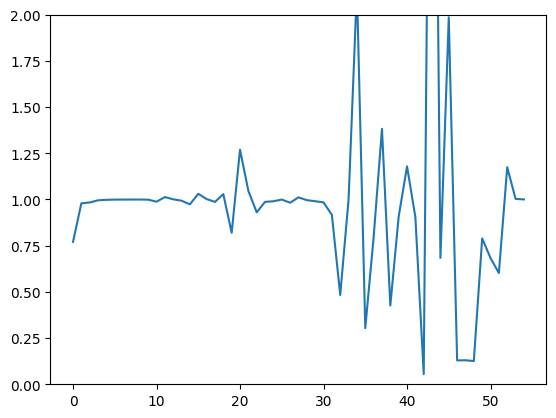

In [8]:
erros = info_broyden["erro real"]
razao = []
for i in range(1, len(erros)):
  razao.append(erros[i]/erros[i-1])
import matplotlib.pyplot as plt
plt.plot(razao)
plt.ylim([0,2])
plt.show()

A convergência para o 1 pode parecer inesperada, mas é apenas consequência das limitações de precisão de ponto flutuante. Observe que imediatamente após haver uma queda significativa, há uma subida no erro que imediatamente leva a 1. Isso significa que o erro ficou tão pequeno que o computador não consegue obter um erro menor, então há convergência. Isso pode ser observado quando 

Observe os passos:

In [9]:
tabela = exibir_vetores(info_broyden)

   i |         x1 |       x2 |        x3 |       x4 |        x5 |    diferença |         erro |       resíduo
-----+------------+----------+-----------+----------+-----------+--------------+--------------+---------------
   1 | 0.010652   |  9.99922 | 5.00103   | 5.03642  | 0.0364587 |  9.98935     | 28.9165      | 509.558
   2 | 0.00930921 |  9.99992 | 3.68549   | 3.74021  | 0.0366096 |  1.31554     | 22.2844      | 276.626
   3 | 0.0081241  | 10.0028  | 2.12982   | 2.2212   | 0.0367878 |  1.55566     | 21.8213      |  92.2181
   4 | 0.00741548 | 10.0072  | 1.36875   | 1.49585  | 0.0368749 |  0.761077    | 21.4654      |  37.9325
   5 | 0.00692512 | 10.0134  | 0.87584   | 1.04643  | 0.0369311 |  0.492909    | 21.3676      |  15.3682
   6 | 0.00665183 | 10.0203  | 0.612067  | 0.82762  | 0.0369611 |  0.263773    | 21.3284      |   7.36023
   7 | 0.0065229  | 10.0273  | 0.48486   | 0.743325 | 0.0369754 |  0.127207    | 21.3123      |   4.51239
   8 | 0.00647632 | 10.0334  | 0.435246  | 0



Observemos a questão do tempo:

In [10]:
qntd_vezes = 1000
params = [x0, Jac, erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
broyden.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 6.4341s
> TEMPO TOTAL MÉDIO: 0.000115s
> TEMPO TOTAL DP: 4.7e-05s
> QNTD MÉDIA DE PASSOS: 56.0
> PERCENTUAIS
* y: 18.3%
* p1: 5.49%
* A_inv: 47.14%
* z: 16.05%
* p: 10.83%
* s1t: 2.19%


O que é menor que o tempo demandado pelo Método de Newton, sendo então mais rápido que o de Newton como esperado, e sendo também menos preciso, conforme a teoria.